In [9]:
import skvideo.io  
import SimpleITK as sitk
from alignment_tools import align_stacks
import numpy as np

In [10]:
videodata = skvideo.io.vread('/net/dk-server/bholloway/Pack-081122_09-29-22_vessel-4_00014_vid.avi')  
videodata = videodata[:,:,:,0]
videodata = videodata/np.max(videodata)*255
print(videodata.shape)

(4379, 128, 128)


In [18]:
all_transforms = dict()
nframes = len(videodata)
fixed = sitk.GetImageFromArray(videodata[0])
error = []
for framei in range(nframes-1):
    try:
        moving = sitk.GetImageFromArray(videodata[framei+1])
        transform = align_stacks(moving,fixed,initial=False,dim=2)
        all_transforms[framei+1] = transform
    except:
        error.append(framei)

RegistrationParameterScalesFromPhysicalShift (0x49a1eb0): Variation in any parameter won't change a voxel position. The default scales (1.0) are used to avoid division-by-zero.

RegistrationParameterScalesFromPhysicalShift (0x49a1eb0): Variation in any parameter won't change a voxel position. The default scales (1.0) are used to avoid division-by-zero.

RegistrationParameterScalesFromPhysicalShift (0x49a1eb0): Variation in any parameter won't change a voxel position. The default scales (1.0) are used to avoid division-by-zero.

RegistrationParameterScalesFromPhysicalShift (0x49a1eb0): Variation in any parameter won't change a voxel position. The default scales (1.0) are used to avoid division-by-zero.

RegistrationParameterScalesFromPhysicalShift (0x49a1eb0): Variation in any parameter won't change a voxel position. The default scales (1.0) are used to avoid division-by-zero.

RegistrationParameterScalesFromPhysicalShift (0x49a1eb0): Variation in any parameter won't change a voxel posi

In [19]:
error

[892, 893, 894, 895]

In [21]:
videodata.shape

(4379, 128, 128)

In [23]:
transformed = np.zeros(videodata.shape)
transformed[0,:,:]=videodata[0]
for framei in range(nframes-1):
    if framei in error:
        continue
    moving = sitk.GetImageFromArray(videodata[framei+1])
    transform = all_transforms[framei+1]
    moving_resampled = sitk.Resample(moving, fixed, transform, sitk.sitkLinear, 0.0, moving.GetPixelID())
    moving_resampled = sitk.GetArrayViewFromImage(moving_resampled)
    transformed[framei+1,:,:] = moving_resampled

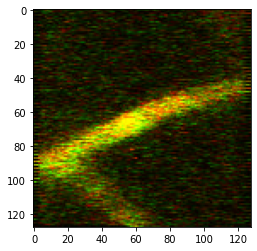

In [16]:
import matplotlib.pyplot as plt
show_fixed = sitk.GetArrayViewFromImage(fixed)
show_array = np.zeros(list(show_fixed.shape)+[3])
show_array[:,:,0] = moving_resampled
show_array[:,:,1] = show_fixed
show_array = show_array.astype(int)
plt.imshow(show_array)

In [24]:
transformed.shape

(4379, 128, 128)

In [25]:
skvideo.io.vwrite('/net/dk-server/bholloway/Pack-081122_09-29-22_vessel-4_00014_vid_fixed.avi',transformed)  


In [26]:
videodata